<a href="https://colab.research.google.com/github/Theosdoor/Data-Cleaning-and-Analysis-Coursework/blob/main/nchw73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

**Problem 1 (40%)**



In [2]:
# TODO change file path before submitting. Maybe use github?? or just change str to filename
# read from excel file
data = pd.read_excel("/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/amazon_laptop_2023.xlsx", sheet_name = 0)

In [3]:
data

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,HP,EliteBook 840,14 Inches,Silver,256 GB,Core i5 6200U,16 GB,Windows 10 Pro,Anti Glare Coating,Integrated,NaN,NaN,4.0,"$1,000.00"
1,Dell,Inspiron 15 3530,15.6 Inches,Black,2 TB,Core i7 Family,64 GB,Windows 11 Home,NaN,Integrated,Intel Iris Xe Graphics,NaN,4.2,"$1,000.00"
2,Dell,Vostro 3510 Laptop,15.6 Inches,Black,1000 GB,Core i7,32 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,"$1,000.99"
3,Dell,Inspiron 7420 2-in-1,14 Inches,"Grey, Gray, Platinum Silver",2000 GB,Core i5,64 GB,Windows 11 Pro,NaN,Integrated,Intel Integrated Graphics,NaN,NaN,"$1,001.11"
4,MSI,Prestige 14Evo A11MO-217,14 Inches,Gary,NaN,Core i7,32 GB,Windows 10,"Anti-glare,Thin Bezel",Integrated,Intel Iris Xe Graphics,NaN,4.2,"$1,001.18"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,Dell,Dell Latitude Rugged 5404,14 Inches,Black,256 GB,Core i7,8 GB,Windows 10 Pro,Backlit Keyboard,Integrated,NaN,NaN,4.3,NaN
4442,HP,HPS13,15 Inches,Grey,128 GB,Pentium Other,4 GB,Windows 11 S,HD Audio,Integrated,NaN,NaN,4.3,NaN
4443,Microsoft,Surface Laptop Go 2,12.4 Inches,Sage,256 GB,Intel Core i5-1135G7,8 GB,Windows 10 S,NaN,Integrated,Intel Iris,NaN,NaN,NaN
4444,dell,DELL Latitude 5300,13.3 Inches,NaN,512 GB,Core i5 8250U,16 GB,Windows 10 Pro,Speakers,Integrated,Intel Integrated Graphics,NaN,4.2,NaN


In [ ]:
print(data.columns.tolist())
print(len(data.columns.tolist()))

['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed', 'rating', 'price']
14


In [4]:
# Drop columns that have all missing data
data.dropna(axis = 1, how = 'all')
data.dropna(axis = 0, how = 'all')
print(len(data.columns), len(data.values)) # no columns/rows dropped

14 4446


<Axes: >

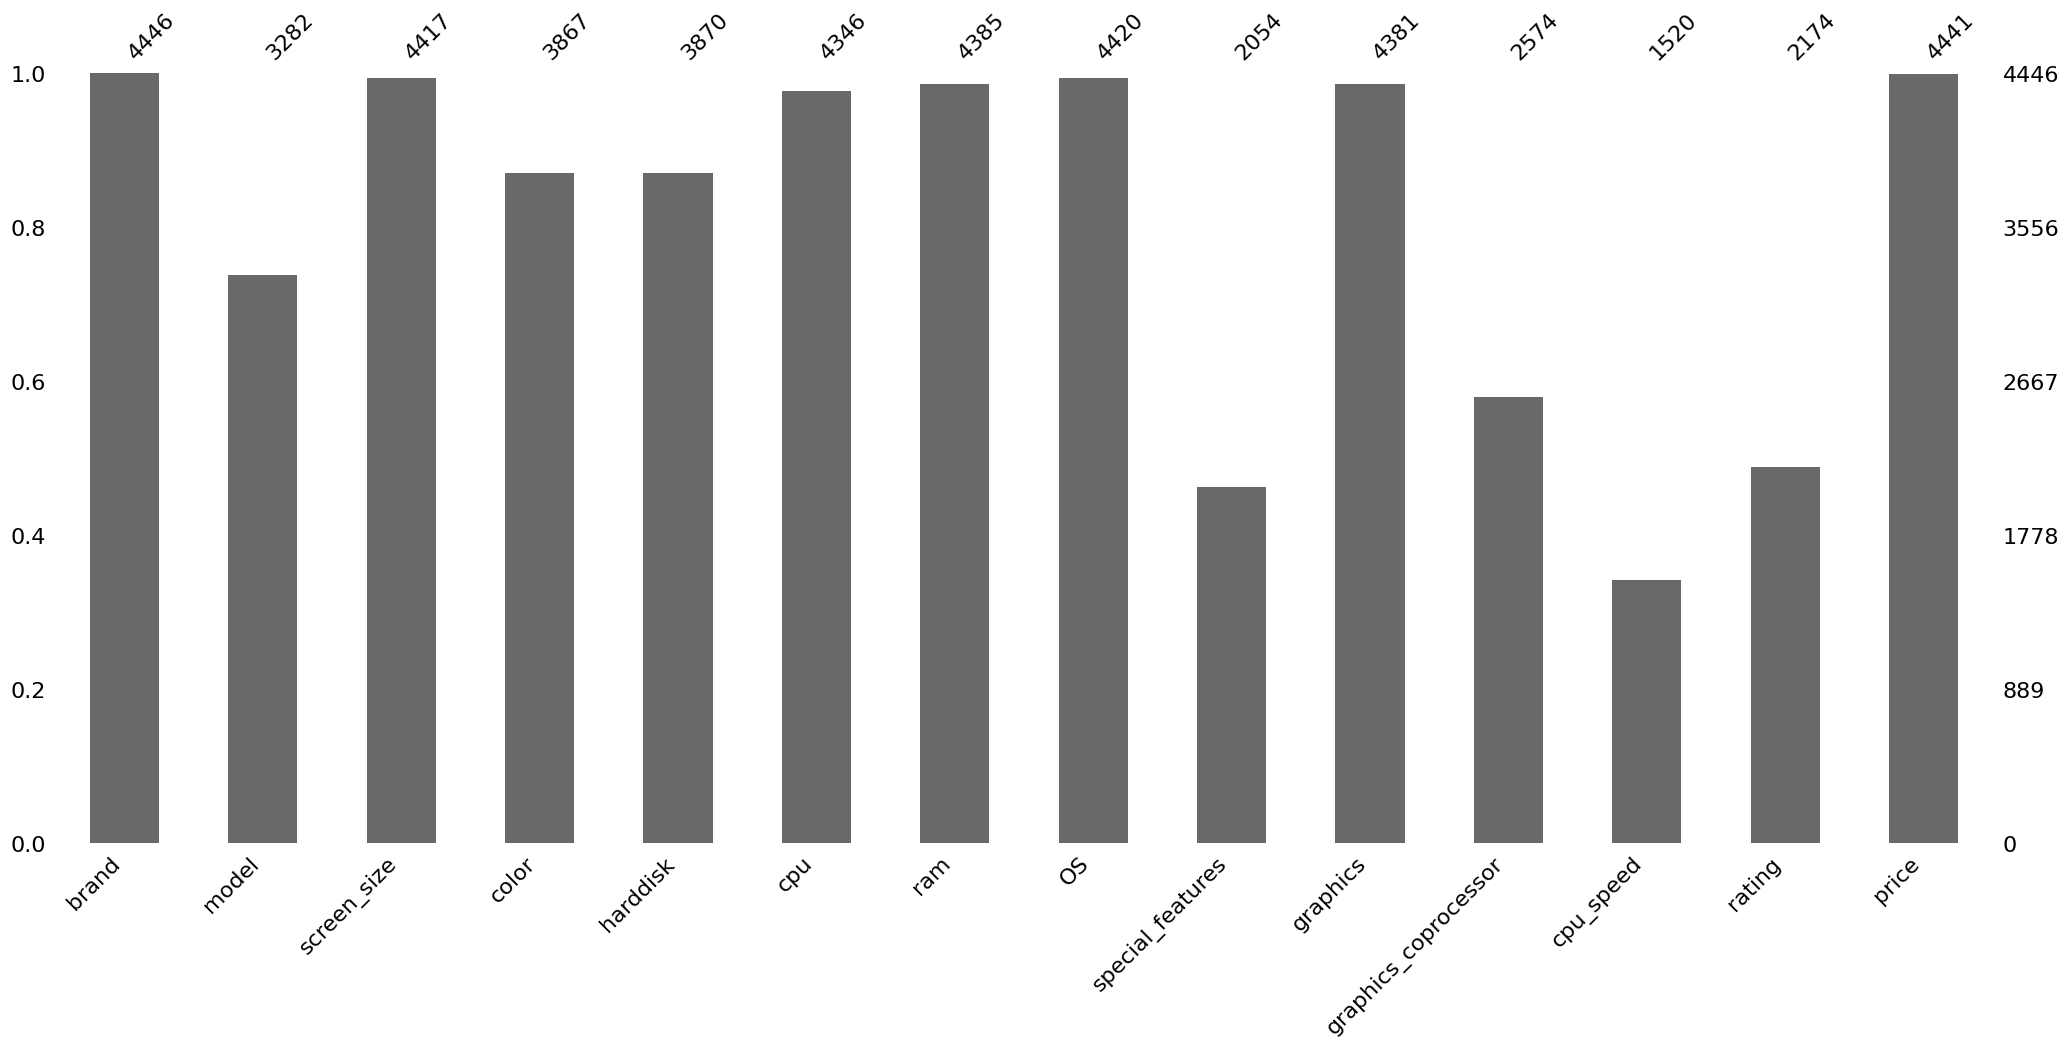

In [5]:
# https://youtu.be/Wdvwer7h-8w
msno.bar(data)
#msno.matrix(data)
#msno.heatmap(data) # correlation of null values b/t cols
#msno.dendrogram(data) # closer connection ==> higher degreee of null value correlation

In [6]:
## What categories absolutely essential for the research question?
# Model: we cannot recommend a laptop if we do not know the model.
# Price: generally an essential consdieration in recommending a laptop, regardless of user requirements.
## Remove all rows that have missing data in these categories.
data.dropna(subset=['model', 'price'], inplace = True)

In [ ]:
data.isna().sum()

brand                      0
model                      0
screen_size               10
color                    487
harddisk                 541
cpu                       44
ram                       54
OS                         8
special_features        1514
graphics                  52
graphics_coprocessor    1815
cpu_speed               2609
rating                  1901
price                      0
dtype: int64

In [ ]:
print(data.dtypes)
# brand, model, color, cpu, OS, special_features, graphics, graphics_coprocessor should be strings
# screen_size, harddisk, ram, cpu_speed, rating, price should be floats

brand                    object
model                    object
screen_size              object
color                    object
harddisk                 object
cpu                      object
ram                      object
OS                       object
special_features         object
graphics                 object
graphics_coprocessor     object
cpu_speed                object
rating                  float64
price                    object
dtype: object


In [7]:
# divide features into catagorical and numerical
cat_features = ['brand', 'model', 'color', 'cpu', 'OS', 'special_features', 'graphics', 'graphics_coprocessor']
num_features = ['screen_size', 'harddisk', 'ram', 'cpu_speed', 'rating', 'price']

In [16]:
# string cleaning
def clean_strings(features):
  '''
  Strips and lowers the case of any strings within the columns specified in the argument, ignoring numerical values.

  Parameters
  ----------
  features : list of strings
    Names of feature columns containing strings to clean (i.e. strip and convert to lower case).

  Returns
  -------
  None
    Modifies feature columns inplace.
  '''
  for col in features:
    # strip and lower case if column entry has string type.
    data[col] = data[col].apply(lambda x: x.lower() if isinstance(x, str) else x)
    data[col] = data[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

clean_strings(data.columns.tolist())

In [ ]:
print(data.columns.tolist())

['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed', 'rating', 'price']


In [18]:
# clean categorical features

# fix brand column
current_feature = 'brand'

# fix spelling errors and make correct any model names if need be (eg. toughbook is a model by Panasonic)
data[current_feature].loc[data[current_feature] == 'enovo'] = 'lenovo'
data[current_feature].loc[data[current_feature] == 'mac'] = 'apple'
data[current_feature].loc[data[current_feature] == 'toughbook'] = 'panasonic'
#data[current_feature].loc[data[current_feature] == 'alienware'] = 'dell'
data[current_feature].loc[data[current_feature] == 'latitude'] = 'dell'

# Change entries that are not brand names to missing data to be dealt with later
data[current_feature].loc[data[current_feature] == 'quality refurbished computers'] = 'NA'
data[current_feature].loc[data[current_feature] == 'best notebooks'] = 'NA'
data[current_feature].loc[data[current_feature] == 'carlisle foodservice products'] = 'NA'

# Group brands with less than 3 instances into 'other' category

print(data[current_feature].unique())

['hp' 'dell' 'msi' 'lenovo' 'acer' 'asus' 'lg' 'apple' 'microsoft'
 'samsung' 'gigabyte' 'panasonic' 'alienware' 'xammue' 'shoxlab' 'razer'
 'corsair' 'xpg' 'lpt' 'vaio' 'NA' 'iview' 'maingear' 'elo' 'gizpro' 'jtd'
 'mytrix' 'goldengulf' 'luqeeg' 'tocosy' 'rokc' 'awow' 'ctl' 'microtella']


<ipython-input-18-571a0c4c677d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'enovo'] = 'lenovo'
<ipython-input-18-571a0c4c677d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'mac'] = 'apple'
<ipython-input-18-571a0c4c677d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'tough

In [19]:
# fix model column
current_feature = 'model'

# fix spelling inconsistencies
data[current_feature] = data[current_feature].str.replace(' laptop','')

# remove brand name if repeated from brand column
for brand in data['brand'].unique():
  data[current_feature] = data[current_feature].str.replace(brand + ' ','')

# add extra details (eg. storage, ram, color) to respective cols?

print(data[current_feature].unique())

['elitebook 840' 'inspiron 15 3530' 'vostro 3510' 'inspiron 7420 2-in-1'
 'prestige 14evo a11mo-217' 'thinkbook 15 g4 iap' 'elite dragonfly g3'
 'precision 3570' 'inspiron 16 5625' 'thinkpad t16 gen 1' 'precision 3480'
 'latitude 5530' 'latitude 5431' 'latitude 5420' 'latitude 3420'
 'xps 13 9300' 'inspiron 3515' 'latitude 7420' 'latitude 3520'
 'thinkbook 14 g4 iap' 'inspiron 5620' 'inspiron 15 3525' 'latitude 9520'
 'prestige 14 evo a11m-221' 'latitude' 'tmp614-51-g2-5442' 'latitude 3540'
 'latitude 9000' 'gf63 thin 10scxr' 'inspiron 3520'
 'latitude 7320 detachable 2-in-1' 'inspiron 3511' 'latitude 5520'
 'thinkpad l15 gen2' 'xps' 'aspire 3 a315' 'xps 9315' 'inspiron 5630'
 'rog strix g15' 'latitude 5430' 'precision 3470' 'xps 13 9305' 'thinkpad'
 'yoga' 'thinkbook 13s g4 iap' 'thinkpad t14 gen 2' 'pavilion 15t-eg300'
 'tuf gaming a17' 'pt14-51-78b4' 'latitude 5340' 'thinkpad l15 gen 3'
 'thinkpad l14 gen 3' 'envy x360 2-in-1' '14z90r-q.apb3u1' 'macbook air'
 'latitude 7520' 'inspir

In [ ]:
# fix color column
current_feature = 'color'

# fix spelling errors and inconsistencies
data[current_feature] = data[current_feature].str.replace('gray','grey')
data[current_feature] = data[current_feature].str.replace('gary','grey')
data[current_feature] = data[current_feature].str.replace('grey, grey','grey')

# Make all missing data nan, ready to fillna later
data[current_feature].loc[data[current_feature] == 'information not available'] = np.nan

# Move misplaced data to correct column
def change_column(entry, current_col, new_col, new_entry = None):
  '''
  Description

  Parameters
  ----------
  entry : string
    Description
  current_col : string
    Description
  new_col : string
    Desc
  new_entry : string, default None
    Desc

  Returns
  -------
  None
    Modifies feature columns inplace.
  '''
  if new_entry == None: # just move current entry to new column if no new entry specified
    new_entry = entry

  row_index = data.index[data[current_col] == entry].tolist() # get row index
  print('Replacing ' + data[new_col].loc[row_index] + ' with ' + new_entry)
  data[new_col].loc[row_index] = new_entry # change corresponding entry for new column
  data[current_col].loc[row_index] = np.nan # change current column entry to NA

#change_column('evo i7-1260p', current_feature, 'cpu') what is evo i7?
change_column('touchscreen', current_feature, 'special_features')

print(data[current_feature].unique())

Series([], Name: special_features, dtype: object)
['silver' 'black' 'grey, platinum silver' 'grey' nan 'carbon grey'
 'titan grey' 'pure silver' 'platinum silver' 'eclipse grey' 'dark moss'
 'natural silver' 'graphite black' 'graphite' 'obsidian black' 'aluminum'
 'arctic grey' 'platinum' 'blue' 'green' 'slate grey'
 'silver/carbon fiber' 'sky' 'shadow grey' 'burgundy red' 'midnight'
 'mecha grey' 'off black' 'gold' 'mineral grey' 'mist blue' 'punk pink'
 'shale black' 'star black' 'carbon fiber' 'grey, silver' 'shadow black'
 'white' 'fog blue' 'rgb backlit' 'cloud grey' 'phantom grey'
 'dark side of the moon' 'basalt grey' 'matte black' 'mystic blue'
 'indie black' 'stormy grey' 'mystic black' 'phantom grey with speckles'
 'ink black' 'galaxy black' 'titan grey dull' 'aluminum titan grey'
 'dark shadow grey' 'royal blue' 'jade black' 'quiet blue' 'mica silver'
 'phantom blue'
 'dark side of the moon with high endurance clear coat and silky smooth finish'
 'lunar white' 'black paint' 

<ipython-input-26-55699340c9b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'information not available'] = np.nan
<ipython-input-26-55699340c9b8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_col].loc[row_index] = new_entry # change corresponding entry for new column
<ipython-input-26-55699340c9b8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_col].l

In [20]:
# fix cpu column
current_feature = 'cpu'

# remove spelling inconsistencies
data[current_feature] = data[current_feature].str.replace('-',' ')
data[current_feature] = data[current_feature].str.replace('_',' ')
data[current_feature] = data[current_feature].str.replace(' processor','')
data[current_feature] = data[current_feature].str.replace(' cpu','')
data[current_feature] = data[current_feature].str.replace('corei','core i')
data[current_feature] = data[current_feature].str.replace(' ghz','ghz') # this will help to move across to cpu_speed col

# Include manufactorer names for naming consistency
data[current_feature] = data[current_feature].str.replace('core i','intel core i')
data[current_feature] = data[current_feature].str.replace('core 2','intel core 2')
data[current_feature] = data[current_feature].str.replace('core m','intel core m')
data[current_feature] = data[current_feature].str.replace('pentium','intel pentium')
data[current_feature] = data[current_feature].str.replace('celeron','intel celeron')
data[current_feature] = data[current_feature].str.replace('xeon','intel xeon')
data[current_feature] = data[current_feature].str.replace('atom','intel atom')
data[current_feature] = data[current_feature].str.replace('ryzen','amd ryzen')
data[current_feature] = data[current_feature].str.replace('a series','amd a series')
data[current_feature] = data[current_feature].str.replace('cortex','arm cortex')

# Correct any errors created by adding manufacturer names
manufs = ['amd', 'intel', 'arm', 'apple']
for man in manufs:
  data[current_feature] = data[current_feature].str.replace(man + ' ' + man, man)

# Make all missing data nan, ready to fillna later
data[current_feature].loc[data[current_feature] == 'unknown'] = np.nan
data[current_feature].loc[data[current_feature] == 'others'] = np.nan

# add cpu speeds to cpu_speed column & remove from this column?


print(data[current_feature].unique())

['intel core i5 6200u' 'intel core i7 family' 'intel core i7'
 'intel core i5' 'amd ryzen 7' 'amd ryzen 5' nan 'amd r series'
 'intel core i5 family' 'intel core i5 1145g7' 'intel core i5 1135g7'
 'amd ryzen 5 4600h' 'intel core i7 10700t' 'intel core i7 12700h'
 'intel core i3' 'amd ryzen 7 5800h' 'intel mobile' 'apple m1'
 '1.2ghz arm cortex a8' 'amd ryzen 5 5500u' 'intel core i7 10750h'
 'intel core i7 1165g7' 'intel core i7 1185g7' 'intel core i7 7500u'
 'intel core i5 1035g1' 'amd ryzen 7 2700u' 'amd ryzen 9' 'intel core i9'
 'intel core i9 7960x' 'snapdragon' 'intel core i7 extreme'
 'intel core i7 8650u' 'intel core i5 7200u' 'intel core i7 11800h'
 'intel core duo' 'intel core i7 8750h' 'intel core i7 12800h'
 'intel core i7 8550u' 'amd a series' 'amd ryzen 9 5900x'
 'intel core i7 1065g7' 'intel core m 5y10'
 'amd a series dual core a4 3300m' 'arm 7100' 'amd ryzen 7 4800h'
 'intel core i7 10875h' 'intel core i5 3320m' 'intel core i3 520m'
 'mediatek mt8183' 'intel celeron' 'in

<ipython-input-20-8c2c444a90f4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'unknown'] = np.nan
<ipython-input-20-8c2c444a90f4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'others'] = np.nan


In [ ]:
# fix OS column
current_feature = 'OS'
# fix spelling inconsistencies ==> easier to group and compare
data[current_feature] = data[current_feature].str.replace('-',' ')
data[current_feature] = data[current_feature].str.replace('win','windows')
data[current_feature] = data[current_feature].str.replace('win','windows')
data[current_feature] = data[current_feature].str.replace('professional','pro')
data[current_feature] = data[current_feature].str.replace('microsoft ','')
data[current_feature] = data[current_feature].str.replace('english/spanish/french','english/french/spanish') # make consistent (alphabetic)
data[current_feature] = data[current_feature].str.replace('supports','support')
data[current_feature] = data[current_feature].str.replace('homes','home s')
data[current_feature] = data[current_feature].str.replace(' in s mode','s')
data[current_feature] = data[current_feature].str.replace('64bit','64 bit')
data[current_feature] = data[current_feature].str.replace('64','64 bit')

# correct new errors
data[current_feature] = data[current_feature].str.replace('windowsdows','windows')
data[current_feature] = data[current_feature].str.replace('bit bit','bit')

# make all missing data NA, ready to fillna later
data[current_feature].loc[data[current_feature] == 'no'] = np.nan # maybe the question was 'Do you know your OS?'
data[current_feature].loc[data[current_feature] == 'unknown'] = np.nan

# put 'hp thinpro' into model col, removing brand name
change_column('hp thinpro', current_feature, 'model', new_entry = 'thinpro')

# remove update names? eg. macos 10.12, windows 8.1

print(data[current_feature].unique())

Series([], Name: model, dtype: object)
['windows 10 pro' 'windows 11 home' 'windows 10 home' 'windows 11 pro'
 'windows 10' 'windows 11' nan 'mac os' 'windows 7' 'chrome os'
 'windows pro' 'macos 10.12 sierra' 'windows' 'macos 12 monterey'
 'windows 10 home 64 bit' 'windows 10 pro (english/french/spanish)'
 'windows 10 pro (64 bit)' 'windows 10 pro / free upgrade to windows 11'
 'windows 7 pro' 'windows 10 s' 'windows 10 s, windows 10' 'windows 8'
 'windows 11 s' 'linux'
 'windows 10 pro 64 bit multi language support english/french/spanish'
 'windows 10 pro 64 bit multi language support english/french/spanish.'
 'windows 10 pro 64 bit' 'windows 11 home s'
 'windows 10 64 bit multi language support english/french/spanish'
 'windows 8.1'
 'windows 10 pro 64 bit multi language support english/french/spanish(renewed)'
 'windows 11 pro, windows' 'windows 8 pro' 'macos 10.14 mojave' 'pc'
 'windows 11 multi home'
 'windows 10 multi language /free upgrade to windows 11'
 'windows 10 dg windows

<ipython-input-28-6cdbe7a6d22c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'no'] = np.nan # maybe the question was 'Do you know your OS?'
<ipython-input-28-6cdbe7a6d22c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'unknown'] = np.nan
<ipython-input-26-55699340c9b8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new

In [ ]:
# fix special features column
current_feature = 'special_features'
# fix spelling inconsistencies ==> easier to group and compare
data[current_feature] = data[current_feature].str.replace('-',' ')
data[current_feature] = data[current_feature].str.replace(', ',',')
data[current_feature] = data[current_feature].str.replace(' ,',',')
data[current_feature] = data[current_feature].str.replace('  ',' ') # fix double spacing
data[current_feature] = data[current_feature].str.replace('water proof','waterproof')
data[current_feature] = data[current_feature].str.replace('kb','keyboard')
data[current_feature] = data[current_feature].str.replace('kyb','keyboard')
data[current_feature] = data[current_feature].str.replace('high definition','hd')
data[current_feature] = data[current_feature].str.replace(',stereo/','')
data[current_feature] = data[current_feature].str.replace('sensor','reader')
data[current_feature] = data[current_feature].str.replace('touch screen','touchscreen')
data[current_feature] = data[current_feature].str.replace('fingerprint reader','fingerprint')
data[current_feature] = data[current_feature].str.replace('pen','stylus')
data[current_feature] = data[current_feature].str.replace('alexa', 'amazon alexa')
data[current_feature] = data[current_feature].str.replace(' laptop','')
data[current_feature].loc[data[current_feature] == 'anti gla'] = 'anti glare'
data[current_feature].loc[data[current_feature] == 'speakers: stereo,keyboard: chiclet,'] = 'stereo speakers,chiclet keyboard'
data[current_feature] = data[current_feature].str.strip()

# correct new errors created
remove_doubleup = ['stylus', 'reader', 'amazon']
for e in remove_doubleup:
  data[current_feature] = data[current_feature].str.replace(e + e, e)
  data[current_feature] = data[current_feature].str.replace(e + ' ' + e, e)

# make all missing data NA, ready to fillna later
data[current_feature].loc[data[current_feature] == 'information not available'] = np.nan

# remove irrelevant data
irrelevant_entries = ['alcohol free', 'dishwasher safe', 'light and compact design lets you stream,work,create,and play on a fast,',
                      'built for entertainment,multitasking & privacy', 'high quality', 'premium business class notebook']
for e in irrelevant_entries:
  data[current_feature].loc[data[current_feature] == e] = np.nan

print(data[current_feature].unique())

['anti glare coating' nan 'wifi & bluetooth' 'anti glare,thin bezel'
 'anti glare screen' 'backlit keyboard' 'anti glare' 'fingerprint'
 'hd audio,backlit keyboard,anti glare coating'
 'hd audio,backlit keyboard,anti glare coating,numeric keypad'
 'fingerprint,hd audio,backlit keyboard,numeric keypad'
 'fingerprint,backlit keyboard,memory card slot'
 'fingerprint,hd audio,backlit keyboard,memory card slot'
 'fingerprint,hd audio,backlit keyboard' 'stylus'
 'fingerprint,hd audio,backlit keyboard,anti glare coating,memory card slot'
 'backlit keyboard,support stylus' 'security slot'
 'anti glare,backlit keyboard' 'backlit keyboard,bezel,fingerprint'
 'full hd anti glare'
 'hd audio,fingerprint,backlit keyboard,support stylus' 'thin bezel'
 'fingerprint,hd audio,backlit keyboard,support stylus,memory card slot'
 'spill resistant'
 'fingerprint,hd audio,backlit keyboard,anti glare coating'
 'backlit keyboard,fingerprint' 'anti glare,backlit keyboard,fingerprint'
 'hd audio' 'nanoedge bezel

<ipython-input-46-f45b684b63fa>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'anti gla'] = 'anti glare'
<ipython-input-46-f45b684b63fa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'speakers: stereo,keyboard: chiclet,'] = 'stereo speakers,chiclet keyboard'
<ipython-input-46-f45b684b63fa>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [ ]:
# graphics and graphics coprocessor columns
# lots of crossover and missing data

# fix spelling inconsistencies ==> easier to group and compare
data['graphics'] = data['graphics'].str.replace('shared','integrated')


print(data['graphics'].unique())

['integrated' 'iris xe graphics' 'radeon graphics' 'nvidia geforce mx250'
 'nvidia geforce rtx a500' 'dedicated' 'integrated, dedicated' nan
 'uhd graphics' 'rtx t600' 't550' 'rtx 3060' 'nvidia geforce mx350'
 'nvidia geforce rtx 3050' 'nvidia geforce rtx 3050 ti'
 'nvidia geforce rtx 2050' 'iris x graphics' 'rtx a3000' 'intel xe'
 'iris xe' 'nvidia quadro t550' 'nvidia geforce rtx 3060' 'quadro t500'
 'nvidia geforce rtx 4050' 'rtx a1000' 'intel iris xáµ‰'
 'nvidia geforce rtx 4060' 'radeon 680m graphics' 'rtx 4070' 'rtx 3050 ti'
 'nvidia geforce rtx 2070 super' 'gt2 graphics'
 'geforce rtx 3070 ti,iris xe graphics' 'nvidia rtx3070'
 'amd radeon rx 540' 'rtx2050' 'rtx a500' 'nvidia quadro t2000'
 'integrated, integrated' 'rtx 3070 ti' 'nvidia geforce rtx 3070 ti'
 't500,iris xe graphics' 'geforce rtx 3080' 'nvidia geforce rtx2060'
 'rtx a2000' 'nvidia geforce mx550' 'intel arc a370m' 'nvidia t1200'
 'nvidia rtx a3000' 'nvidia quadro rtx 3000' 't1200' 'nvidia rtx a2000'
 'nvidia geforc

In [ ]:
# fix graphics coprocessor column

print(data['graphics_coprocessor'].unique())

[nan 'intel iris xe graphics' 'intel integrated graphics'
 'amd radeon graphics' 'intel' 'intel uhd graphics'
 'integrated iris xe graphics' 'amd integrated graphics'
 'nvidia geforce rtx 3050 ti 4gb gddr6' 'intel uhd graphics 620'
 'nvidia geforce rtx 3050 ti' 'xps9300-7909slv-pus' 'amd radeon 680m'
 'intel hd' 'nvidia geforce rtx 4050' 'amd radeon pro 560'
 'nvidia geforce rtx 3050' 'nvidia geforce rtx 3060'
 'nvidia â® geforce rtxâ„¢ 4050' 'intel iris' 'intel hd graphics 520'
 'intel hd graphics' 'intel iris xe graphics eligible integrated'
 'nvidia quadro t1000' 'nvidia geforce gtx 1660' 'intel hd graphics 620'
 'nvidia â® geforce rtxâ„¢ 2060' 'quadro p1000' 'nvidia geforce gtx 1050'
 'intel hd graphics 6000' 'nvidia rtx a1000' 'nvidia geforce gtx 1060'
 'uhd graphics' 'amd radeon rx vega 11' 'intel celeron'
 'nvidia geforce gtx 1650' 'amd radeon rtx 3070' 'intel iris plus'
 'nvidia geforce rtx 4070' 'intel hd graphics 400'
 'nvidia geforce rtx 4060' 'amd radeon rx 540' 'intel uhd 

In [ ]:
# clean numerical features

# fix price column
current_feature = 'price'

data[current_feature] = data[current_feature].str.replace(',','')
data[current_feature] = data[current_feature].str.replace('$','')

# change to float type
data[current_feature] = data[current_feature].astype(float)

print(data[current_feature].unique())

[1000.   1000.99 1001.11 ...  999.95  999.99     nan]


<ipython-input-48-5b52e2c847d8>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[current_feature] = data[current_feature].str.replace('$','')


In [ ]:
# RQ only considering laptops < $1500, so remove all rows above this price
too_expensive = data[data['price'] >= 1500]
data = data[data['price'] < 1500]
too_expensive

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
572,dell,xps 9315,13.4 Inches,platinum silver,1000 GB,intel core i7,32 GB,windows 11 home,NaN,integrated,intel integrated graphics,NaN,NaN,1501.49
573,dell,xps 9320,13.4 Inches,gray,1000 GB,intel core i7,16 GB,windows 11 pro,wifi & bluetooth,integrated,NaN,NaN,NaN,1502.99
574,lenovo,thinkpad x1 nano gen1,13 Inches,black paint,256 GB,intel core i7 family,16 GB,windows 11 pro,anti glare screen,iris xe graphics,NaN,NaN,5.0,1504.08
575,dell,precision 3470,14 Inches,black,1000 GB,intel core i7,32 GB,windows 11 pro,NaN,integrated,intel integrated graphics,NaN,5.0,1507.16
576,dell,latitude 5340 multi-touch 2-in-1,13.3 Inches,NaN,512 GB,intel core i7,32 GB,windows 11 pro,NaN,integrated,intel iris xe graphics,5.2 GHz,NaN,1507.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,hp,zbook fury 15 g8,15.6 Inches,NaN,1 TB,intel core i9,64 GB,windows 10 pro,"anti glare screen,miracast technology","rtx a5000,uhd graphics",nvidia intel rtx a5000 uhd graphics,NaN,1.0,4999.00
2830,msi,creatorz17046,17 Inches,gray,2 TB,intel core i9,32 GB,windows 11 pro,NaN,integrated,nvidia geforce rtx 3080 ti,NaN,4.6,5499.00
2831,hp,zbook fury g8,17.3 Inches,NaN,1 TB,intel core i9,64 GB,windows 11 pro,anti glare screen,"rtx a5000,uhd graphics",nvidia intel rtx a5000 uhd graphics,NaN,NaN,5598.29
2832,razer,blade 17,17.3 Inches,black,1 TB,intel core i9,32 GB,windows 11,NaN,rtx 3080 ti,NaN,5 GHz,3.7,5599.00


In [ ]:
# clean screen_size column
current_feature = 'screen_size'

data[current_feature] = data[current_feature].str.replace(' inches', '')

# change to float type
data[current_feature] = data[current_feature].astype(float)

print(data[current_feature].unique())

[14.   15.6  13.5  16.   11.6  15.   13.   13.4  13.3  17.3    nan 17.
 15.3  13.6  13.9  16.1  13.1  15.66 15.4  12.   16.2  10.1  27.   14.1
 18.   14.5  22.   12.5  12.45 14.4  10.5  11.   12.2  10.   12.3  12.4 ]


In [ ]:
# clean harddisk column
current_feature = 'harddisk'

data[current_feature] = data[current_feature].str.replace(' gb', '')
data[current_feature] = data[current_feature].str.replace(' tb', '000')
data[current_feature] = data[current_feature].str.replace(' mb', '') # assume MB is typo of GB, since MB values quite large or should I remove?
#assume float value of 64 is GB

# change to float type
data[current_feature] = data[current_feature].astype(float)

print(data[current_feature].unique())

[2.560e+02 2.000e+03 1.000e+03       nan 5.120e+02 1.280e+02 4.000e+03
 2.048e+03 1.600e+01 1.024e+03 6.000e+03 3.000e+03 8.000e+03 1.256e+03
 3.200e+02 1.600e+02 3.200e+01 6.400e+01 1.200e+02 5.000e+02 2.500e+02
 1.500e+00 1.512e+03 6.500e+01 8.000e+00 1.152e+03 6.400e+02 2.400e+02
 4.800e+02 1.920e+00 3.000e+02]


In [ ]:
# clean ram column
current_feature = 'ram'

data[current_feature].replace(regex=True, inplace=True, to_replace=r'\D', value=r'')

# change to float type
data[current_feature] = data[current_feature].astype(float)

print(data[current_feature].unique()) # all in GB

[1.600e+01 6.400e+01 3.200e+01 8.000e+00       nan 1.200e+01 4.000e+00
 2.400e+01 4.000e+01 5.000e+00 1.000e+00 4.800e+01 2.000e+00 3.199e+03
 6.000e+00 2.000e+01 1.280e+02 9.600e+01]


In [ ]:
# fix cpu speed column
current_feature = 'cpu_speed'

# fix spelling errors and unit inconsistencies
data[current_feature] = data[current_feature].str.replace('ghz', '') # assume GHz as default unit, since values between 1-6 are likely GHz

# change to float type
data[current_feature] = data[current_feature].astype(float)

print(data[current_feature].unique())

[nan '3.6 ' '2.1 ' '4.4 ' '3 ' '1.7 ' '3.5 ' '3.7 ' '2133 mhz' '4.2 '
 '2.6 ' '1.8 ' '3.4 ' '4.7 ' '1.9 ' '4.6 ' '2.2 ' '4.5 ' '1.6 ' '3.2 '
 '3200 hz' '2.4 ' '2.5 ' '5.2 ' '5 ' '3.49 ' '2.9 ' '2.8 ' '4.8 ' '0.9 '
 '5.6 ' '2.3 ' '2 ' '5.1 ' '1.3 ' '2.7 ' '2.66 ' '1.1 ' '1 ' '1.2 ' '3.9 '
 '3.8 ' '1.4 ' '4 ' '4.3 ' '3.3 ' '2.53 ' '1.5 ']


In [ ]:
# update numeric column names
data.rename(columns = {'price': "price ($)", "screen_size" : "screen_size (in)", "harddisk" : "harddisk (GB)", "ram" : "ram (GB)"}, inplace = True)

In [ ]:
# Fill missing values

#data[cat_features].fillna('NA', inplace = True)
#data[num_features].fillna(np.NaN, inplace = True)


In [ ]:
# Outliers

In [ ]:
# Reduce number of categories

In [ ]:
# Duplicated data

# How many rows are exact duplicates?
n_dupes = 0
for b in data.duplicated():
  if b == True:
    n_dupes += 1

print(n_dupes, 'duplicate rows.\n')
#drop rows
data.drop_duplicates(inplace=True)

354 duplicate rows.

